### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$ 24999, \\$ 25000 - \\$ 37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [25]:
data = pd.read_csv("C:/Users/Raj03/Downloads/assignment5_1_starter/data/Coupons.csv")

In [26]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [27]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [28]:
visit_frequency_cols = [
    'Bar',
    'CoffeeHouse',
    'CarryAway',
    'RestaurantLessThan20',
    'Restaurant20To50'
]
fill_value = 'never' 
data[visit_frequency_cols] = data[visit_frequency_cols].fillna(fill_value)
print(data[visit_frequency_cols].head()) 

     Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
0  never       never     never                  4~8              1~3
1  never       never     never                  4~8              1~3
2  never       never     never                  4~8              1~3
3  never       never     never                  4~8              1~3
4  never       never     never                  4~8              1~3


4. What proportion of the total observations chose to accept the coupon?



In [29]:
data[['Y']].mean()

Y    0.568433
dtype: float64

5. Use a bar plot to visualize the `coupon` column.

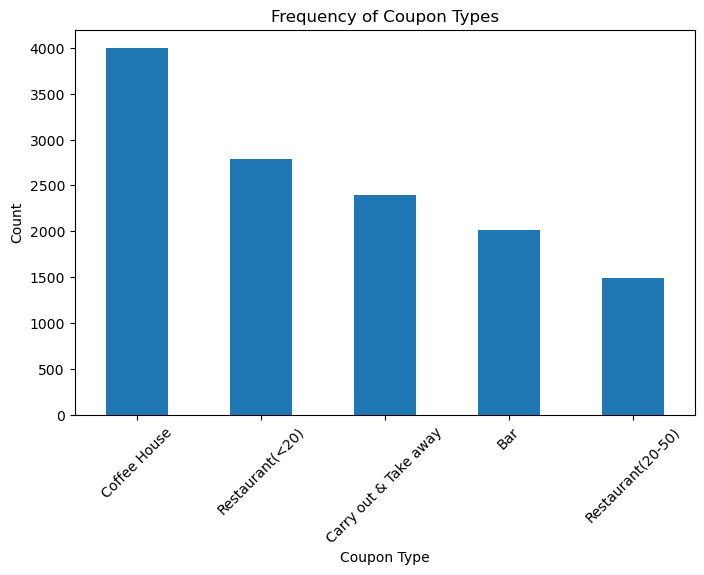

In [30]:
df5=data['coupon'].value_counts().plot(kind='bar', figsize=(8, 5), rot=45)
plt.title('Frequency of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show() 

6. Use a histogram to visualize the temperature column.

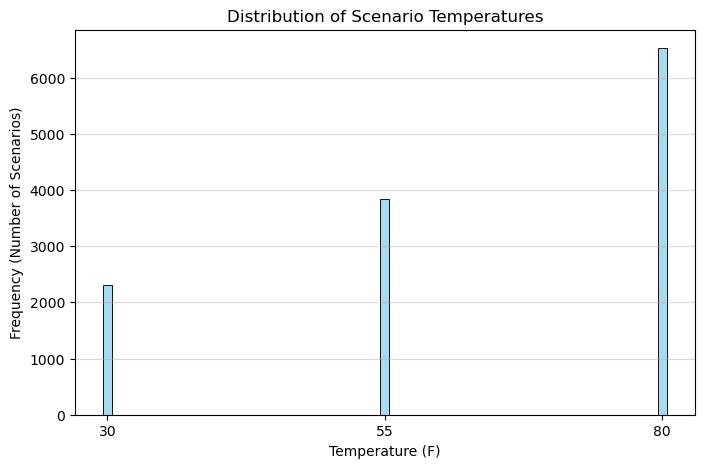

In [31]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=data, 
    x='temperature', 
    discrete=True,  # Treats the numbers as categories (bins)
    shrink=0.8,     # Adds a small gap between the bars
    color='skyblue', 
    edgecolor='black'
)

plt.title('Distribution of Scenario Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency (Number of Scenarios)')
plt.xticks(data['temperature'].unique()) # Optional: Ensures only the data values appear on the x-axis
plt.grid(axis='y', alpha=0.5)
plt.show()

**Investigating the Bar Coupons**


Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [33]:
data[data['coupon'] == 'Bar']['Y'].mean()

np.float64(0.41001487357461575)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [34]:
low_frequency_bar_visits = ['never', 'less1', '1~3']
data.groupby(data['Bar'].isin(low_frequency_bar_visits))['Y'].mean()

Bar
False    0.622456
True     0.561595
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
bar_freq_more_than_once = ['1~3', '4~8', 'gt8']

age_over_25 = ['26', '31', '36', '41', '46', '50plus']
is_target_group = (
    data['Bar'].isin(bar_freq_more_than_once) & 
    data['age'].isin(age_over_25)
)
data.groupby(is_target_group)['Y'].mean()

False    0.553548
True     0.621534
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [36]:
# Define the conditions
bar_freq_more_than_once = ['1~3', '4~8', 'gt8']
passenger_not_kid = data['passanger'] != 'Kid(s)'
occupation_not_ff = data['occupation'] != 'Farming Fishing & Forestry'

# Create the combined Boolean condition using the AND operator (&)
is_target_group = (
    data['Bar'].isin(bar_freq_more_than_once) & 
    passenger_not_kid &
    occupation_not_ff
)

# Group by the boolean Series and calculate the mean of 'Y'
data.groupby(is_target_group)['Y'].mean()

False    0.545950
True     0.623106
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [37]:
# --- Define common categories ---
bar_freq_more_than_once = ['1~3', '4~8', 'gt8']
age_under_30 = ['below21', '21', '26']
rest_less_20_more_than_4 = ['4~8', 'gt8']
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# --- Define Condition A (AND) ---
Condition_A = (
    data['Bar'].isin(bar_freq_more_than_once) & 
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)

# --- Define Condition B (AND) ---
Condition_B = (
    data['Bar'].isin(bar_freq_more_than_once) & 
    data['age'].isin(age_under_30)
)

# --- Define Condition C (AND) ---
Condition_C = (
    data['RestaurantLessThan20'].isin(rest_less_20_more_than_4) & 
    data['income'].isin(income_less_than_50k)
)

# --- Combine all conditions with OR (|) ---
is_target_group = Condition_A | Condition_B | Condition_C

# --- Group by the boolean Series and calculate the mean of 'Y' ---
data.groupby(is_target_group)['Y'].mean()

False    0.543149
True     0.605396
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [38]:
data_hypo=" Hypothesis: Acceptance of bar coupons is a combination of high bar frequency and no minor passengers, right age. The coupon acts as a final nudge when a person is already inclined toward that type of destination and the circumstances permit a stop."
data_hypo

' Hypothesis: Acceptance of bar coupons is a combination of high bar frequency and no minor passengers, right age. The coupon acts as a final nudge when a person is already inclined toward that type of destination and the circumstances permit a stop.'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [39]:
data_coffee = data[data['coupon'] == 'Coffee House'].copy()

In [40]:
# Define the condition for high frequency coffee use
is_high_frequency = data_coffee['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])

# Group by the boolean condition and calculate the acceptance rate
coffee_freq_comparison = data_coffee.groupby(is_high_frequency)['Y'].mean()

In [41]:
time_dest_comparison = data_coffee.groupby(['time', 'destination'])['Y'].mean().unstack(fill_value=0)
time_dest_comparison

destination,Home,No Urgent Place,Work
time,,,
10AM,0.000000,0.640712,0.000000
10PM,0.284974,0.682692,0.000000
2PM,0.000000,0.547859,0.000000
6PM,0.382313,0.474860,0.000000
7AM,0.000000,0.000000,0.445783


In [ ]:
Independent_investigation=" Hypotheses for Coffee House Coupon Acceptors Drivers who accept Coffee House coupons are likely people whose need for coffee aligns with their existing travel routine or leisure time.Habitual Reinforcement: The primary characteristic is high coffee consumption frequency. For these users, the coupon functions as a valuable discount for a highly-desired product, not an incentive to change a destination or habit.Routine Fueling: Acceptance is elevated when the trip context suggests routine-based consumption (e.g., stopping for morning caffeine on the way to work at 7AM).Leisure Stop: Acceptance is highest when the driver has no fixed destination and the time is amenable to a pause (late morning or late night). The No Urgent Place finding suggests the coffee house is often the new destination, prompted solely by the coupon."
Independent_investigation

'Hypotheses for Coffee House Coupon Acceptors Drivers who accept Coffee House coupons are likely people whose need for coffee aligns with their existing travel routine or leisure time.Habitual Reinforcement: The primary characteristic is high coffee consumption frequency. For these users, the coupon functions as a valuable discount for a highly-desired product, not an incentive to change a destination or habit.Routine Fueling: Acceptance is elevated when the trip context suggests routine-based consumption (e.g., stopping for morning caffeine on the way to work at 7AM).Leisure Stop: Acceptance is highest when the driver has no fixed destination and the time is amenable to a pause (late morning or late night). The No Urgent Place finding suggests the coffee house is often the new destination, prompted solely by the coupon.'